In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import os 
import pathlib 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [16]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/dell/.keras/datasets/flower_photos')

In [17]:

path =r'C:/Users/dell/.keras/datasets/flower_photos'

In [18]:

data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/dell/.keras/datasets/flower_photos')

In [19]:
data_dir = data_dir / 'flower_photos'
for i in data_dir.iterdir():
    print(i)


C:\Users\dell\.keras\datasets\flower_photos\flower_photos\daisy
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\dandelion
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\LICENSE.txt
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\roses
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\sunflowers
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\tulips


In [20]:
##preparing dataset 
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [21]:

##label encoding 
flowers_label = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [22]:
print(len(flower_dict["sunflowers"]))


699


In [23]:
flower_dict["sunflowers"][0]


WindowsPath('C:/Users/dell/.keras/datasets/flower_photos/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

In [24]:
no_of_classes = len(flower_dict.items())
no_of_classes

5

In [25]:

x , y = [], []
for key , value in flower_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        reduced_img = cv2.resize(img,(224,224))
        x.append(reduced_img)
        y.append(flowers_label[key])

In [26]:
x = np.array(x)
y = np.array(y) 
x.shape, y.shape

((3670, 224, 224, 3), (3670,))

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x
                                                       ,y
                                                       ,test_size=0.2,
                                                       random_state=0)

In [28]:

##normalise 
x_train_scaled = x_train/255
x_test_scaled = x_test/255

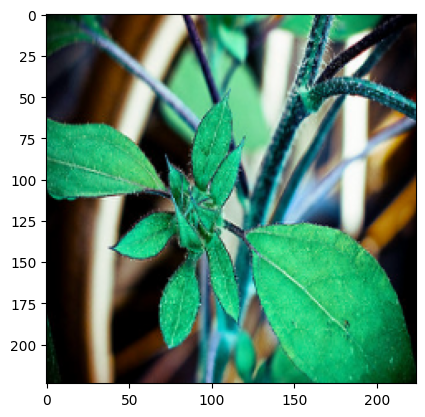

In [29]:
plt.imshow(x_train_scaled[166])
plt.show()


In [30]:
##cnn archi
#conv-->moxpool-->conv-->maxpool-->conv-->flatten-->dense-->dense

In [35]:

# callbacks - are functions that are called during the training process
##early stopping -- 
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='accuracy',
                              
                              patience=2,#patience is the numbe
                            #   r of
                            #  epochs with no improvement after which training will be stopped
                              restore_best_weights=True

                              )

In [36]:
# This is an example of a model definition cell
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    # Input layer
    layers.Input(shape=(224, 224, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax') # 5 classes for the 5 flower types
])

# You also need to compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit (x_train_scaled , y_train , epochs=5 , callbacks=[earlystopping])

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 71s 733ms/step - accuracy: 0.3510 - loss: 2.6292
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 65s 709ms/step - accuracy: 0.5861 - loss: 1.0463
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 55s 593ms/step - accuracy: 0.7218 - loss: 0.7473
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 670ms/step - accuracy: 0.8720 - loss: 0.3779
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 68s 740ms/step - accuracy: 0.9397 - loss: 0.2178


In [ ]:
##cifar-10 dataset --- car , airplane , bird , cat , dog

In [38]:
# Assuming your model has been trained, for example:
# model.fit(x_train_scaled, y_train, epochs=5)

# Save the entire model to a single file named 'flower_classifier.keras'
model.save('flower_classifier.keras')

print("Model saved successfully!")

Model saved successfully!


In [39]:
import tensorflow as tf
import numpy as np

# Load the model from the file
loaded_model = tf.keras.models.load_model('flower_classifier.keras')

# You can immediately use the loaded model to make predictions
# (Assuming 'new_image' is a new image you've prepared correctly)
# prediction = loaded_model.predict(np.expand_dims(new_image, 0))

# You can also inspect the model to see that its architecture is intact
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,891,153 (136.91 MB)

 Trainable params: 11,963,717 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,927,436 (91.28 MB)